In [1]:
%load_ext autoreload
%autoreload 2

from itertools import product

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from simulator import FraudForcastingDataSimulator
from models import LossDevelopmentCurveModel
import weibull as wb

In [2]:
MATURATION_TIME = 31*3

In [3]:
simulator = FraudForcastingDataSimulator(ultimate_loss_mean=100.0, ultimate_loss_std=10.0)
g = simulator.simulate_one_random_group()

Text(0, 0.5, 'Loss')

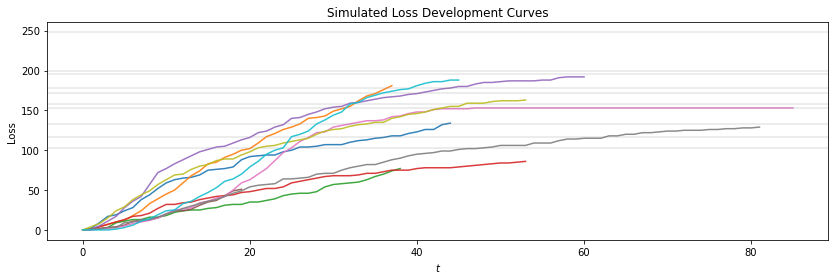

In [6]:
fig, ax = plt.subplots(figsize=(14, 4))

simulator = FraudForcastingDataSimulator(ultimate_loss_mean=150.0, ultimate_loss_std=30.0)

for _ in range(10):
    group = simulator.simulate_one_random_group()
    ax.plot(group['t'], group['y'], alpha=0.9)
    ax.axhline(group['ultimate_loss'][0], color='grey', alpha=0.2)

ax.set_title("Simulated Loss Development Curves")
ax.set_xlabel("$t$")
ax.set_ylabel("Loss")

[  0.           4.97603926  11.57588881  18.91499391  26.72338407
  34.84908705  43.19140852  51.67802166  60.25446112  68.87845268
  77.51650993  86.1417329   94.73230332 103.27041141 111.74146483
 120.13348957 128.43666651 136.64296615 144.74585653 152.74006657
 160.62139225 168.38653638 176.03297498 183.55884522 190.96285063
 198.24418073 205.40244231 212.43760064 219.34992879 226.13996401
 232.80846986 239.35640336 245.78488649 252.09518124 258.28866793
 264.36682618 270.33121826 276.18347459 281.92528087 287.55836698
 293.08449705 298.50546089 303.82306644 309.0391331  314.15548592
 319.17395059 324.09634889 328.92449493 333.66019172 338.30522827
 342.86137708 347.33039192 351.71400604 356.01393055 360.23185309
 364.36943669 368.4283189  372.410111   376.31639741 380.14873524
 383.90865393 387.59765503 391.21721208 394.76877051 398.25374768
 401.67353298 405.02948793 408.3229464  411.55521481 414.72757245
 417.84127172 420.89753851 423.89757254 426.84254769 429.73361248
 432.57189

Text(0.5, 1.0, 'Model Likelihood and Loss')

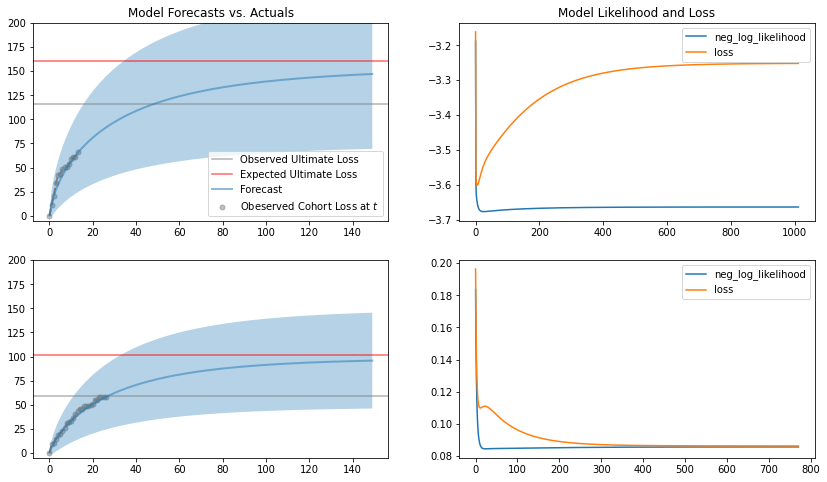

In [152]:
N = 2

simulator = FraudForcastingDataSimulator(
    n_obs_min=5, n_obs_max=30, ultimate_loss_mean=100.0, ultimate_loss_std=30.0)
models = []

fig, axs = plt.subplots(N, 2, figsize=(14, 4*N))

for ax0, ax1 in axs:
    
    df = simulator.simulate_multiple_groups(n_groups=1)
    
    ax0.plot(df['t'], df['y'], color='grey', linestyle='--', linewidth=2)
    ax0.scatter(df['t'], df['y'], color='grey', s=25, alpha=0.5, label="Obeserved Cohort Loss at $t$")

    ax0.axhline(df['ultimate_loss'][0], color='grey', alpha=0.6, label="Observed Ultimate Loss")
    ax0.axhline(df['expected_ultimate_loss'][0], color='red', alpha=0.6, label="Expected Ultimate Loss")
    
    model = LossDevelopmentCurveModel(
        ul_prior_mean=100.0, ul_prior_std=50.0, initial_ul=100.0,
        shrinkage=0.1, learning_rate=0.1)
    model.fit(df['t'].values, df['y'].values)
    
    t = np.arange(150)
    forecast = model.forecast(t)
    ax0.plot(t, forecast, alpha=0.5, linewidth=2, label="Forecast")
    
    max_t = np.max(df['t'])
    t = np.arange(0, 150)
    ax0.fill_between(
        t, 
        forecast + 2 * model.forecast_interval(t), 
        forecast - 2 * model.forecast_interval(t),
        alpha=0.33
    )
    
    ax0.set_ylim([-5.0, 200.0])
    
    ax1.plot(np.arange(len(model.log_likelihoods)), -np.array(model.log_likelihoods), label='neg_log_likelihood')
    ax1.plot(np.arange(len(model.losses)), model.losses, label='loss')     
    ax1.legend()
    
axs[0][0].legend()
axs[0][0].set_title("Model Forecasts vs. Actuals")
axs[0][1].legend()
axs[0][1].set_title("Model Likelihood and Loss")